In [55]:
import subprocess
import pandas as pd
from io import StringIO

In [56]:
TASMOTA_IP = '192.168.188.56'
INTERVAL = 1
PERIOD = 30

The following cell will execute the observe script for 30 seconds with a 1 second interval

In [57]:
csv = subprocess.run(['sh', 'observe.sh', TASMOTA_IP, f'{INTERVAL}', f'{PERIOD}'], stdout=subprocess.PIPE).stdout.decode('utf-8')

In [64]:
df = pd.read_csv(StringIO(csv), sep=',')

In [65]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%dT%H:%M:%S')

In [69]:
df.head()

,Time,Power
0,2022-07-26 15:31:01,10
1,2022-07-26 15:31:02,9
2,2022-07-26 15:31:03,8
3,2022-07-26 15:31:05,8
4,2022-07-26 15:31:06,10


<AxesSubplot:xlabel='Time'>

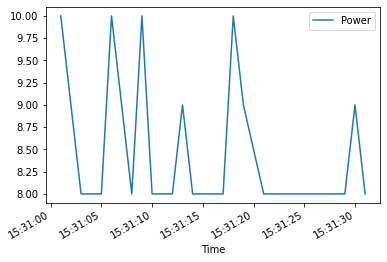

In [71]:
df.plot(x='Time', y='Power')